# Marketing Campaign Analysis

## Problem Statement

The goal of this project is to develop a machine learning model that predicts a customer's response to an offer for a specific product or service. The model will enable targeted marketing strategies and optimize campaign effectiveness.


##  1. Loading libraries and data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gcolor='#04622E'
g2='#022711'
b1='#3D8F87'

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset/marketing_campaign.csv',sep='\t')
data.shape

(2240, 29)

In [3]:
data.head(2240)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 2. Reading data documentation

### Dataset
We have a dataset containing customer information, including demographic data, transaction history, and previous campaign interactions. The dataset also includes a binary target variable indicating whether the customer responded to the offer or not.


Here’s the list of variables and their meaning, taken from the data source:
``` 
# People
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

# Promotion
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*Response*: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

## 3. Univariate data analysis

In [4]:
# datatype
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
# change datatype of Dt_Customer
data.Dt_Customer = pd.to_datetime(data.Dt_Customer)

In [6]:
# Duplicates
data.duplicated(subset=['ID']).sum()

0

In [7]:
# missing values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

> *Our data looks pretty clean, except for Income, for which there are **24 missing values** (*around 1%*). 
We can move on with the data as it is, or we can drop the rows.

In [8]:
 # Drop rows with missing values in the column
data = data.dropna()

In [9]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Distributions - continuous values

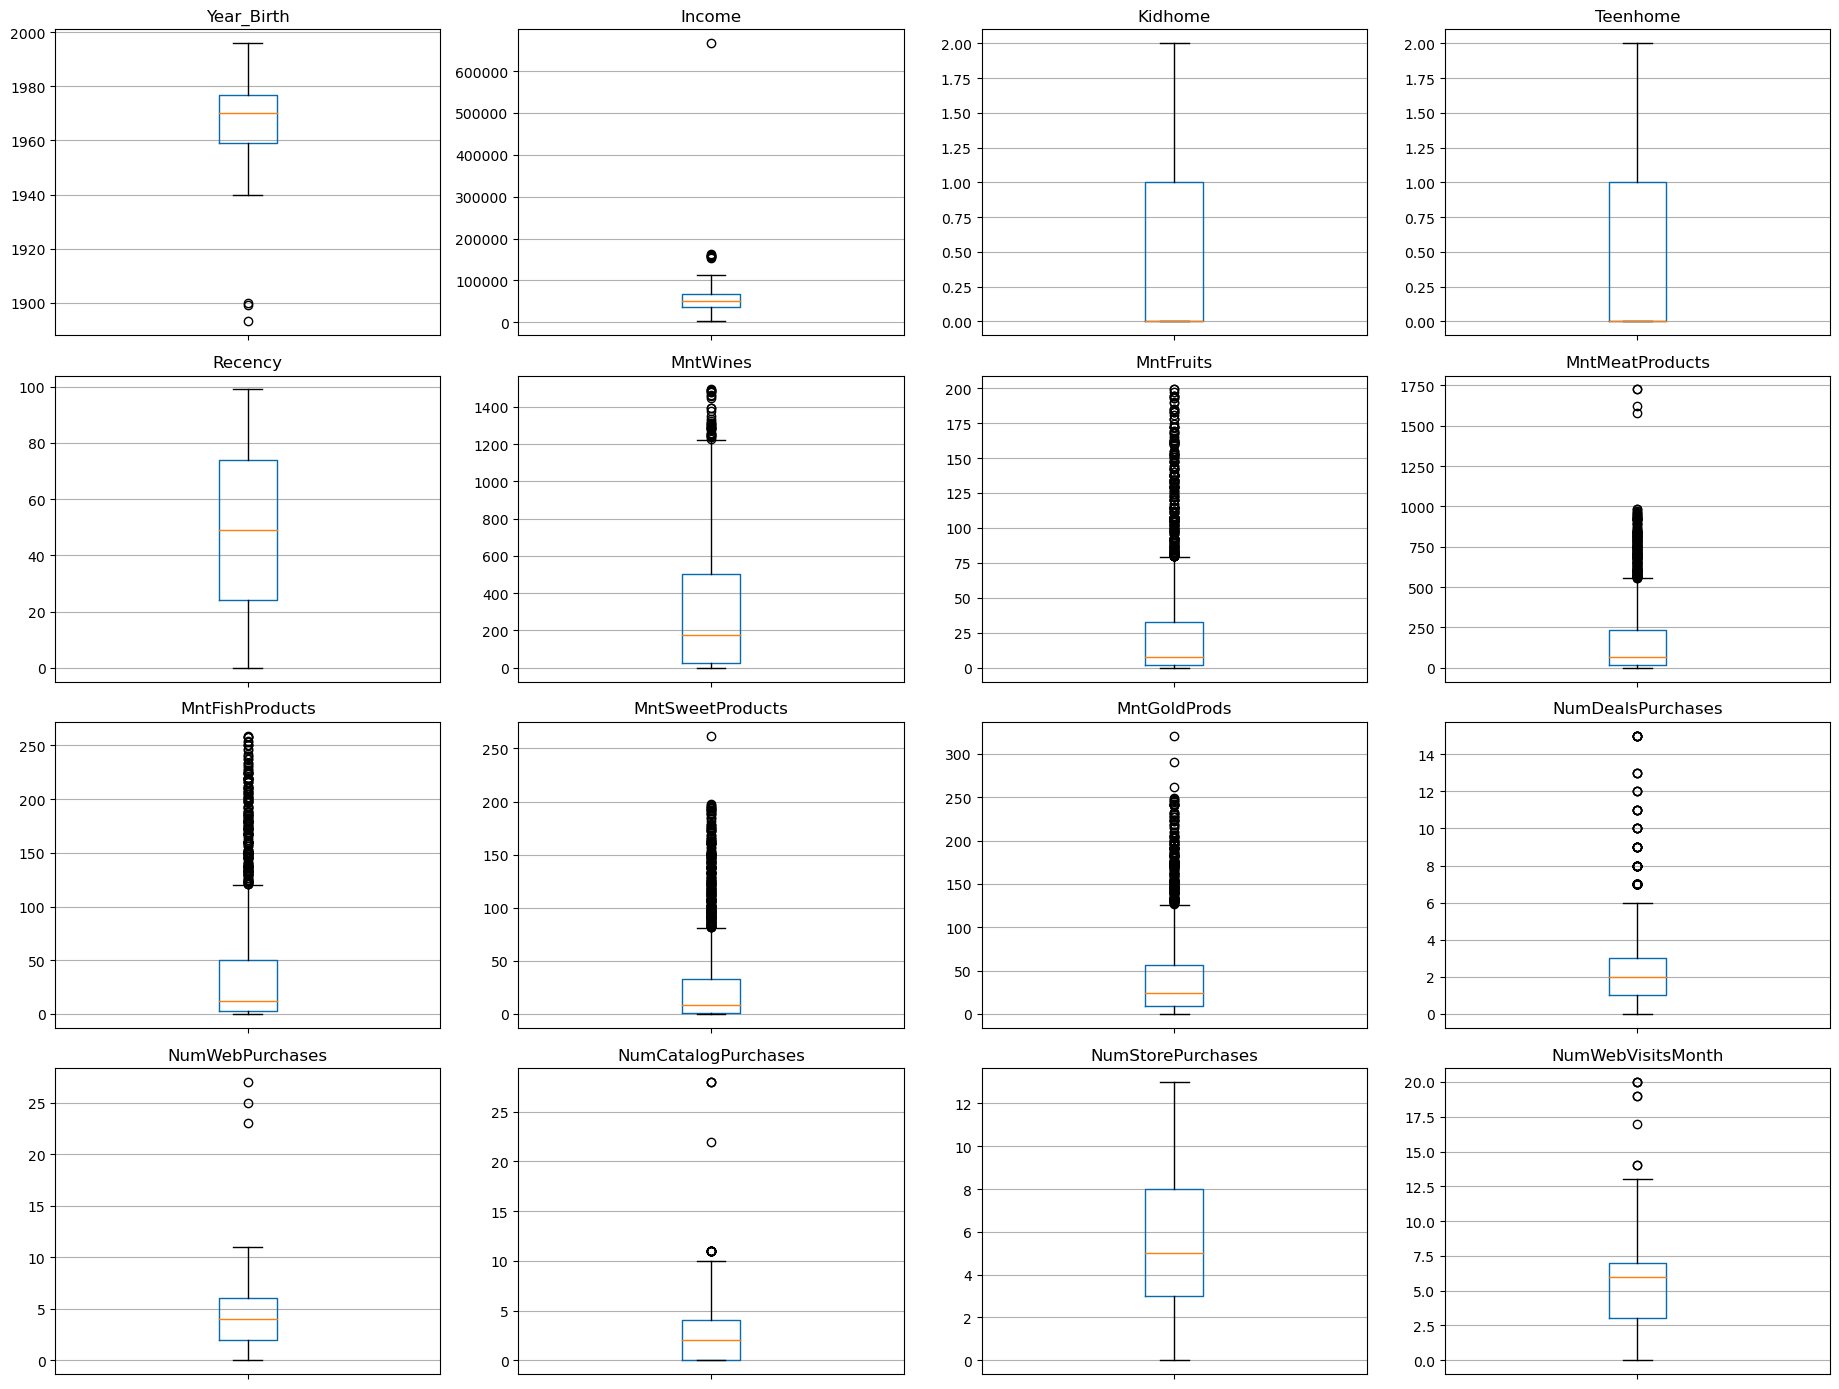

In [10]:

cont_vars = [
    'Year_Birth', 'Income', 'Kidhome','Teenhome','Recency', 
    'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    ] 

fig, axes = plt.subplots(nrows=4,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(cont_vars):
    ax = axes[i]
    ax.boxplot(data[col],boxprops=dict(color=(6/255, 106/255, 178/255)))
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

Two continuous variables that are not in the above plots are: **Z_CostContact and Z_Revenue**, which are always equal to 3 and 11, respectively. I assume they mean the cost of contacting a customer and the associated revenue if a customer accepts the offer, although we can’t be 100% sure. Either way, since they are constants, they are not relevant for our exploratory data analysis.

### Categories

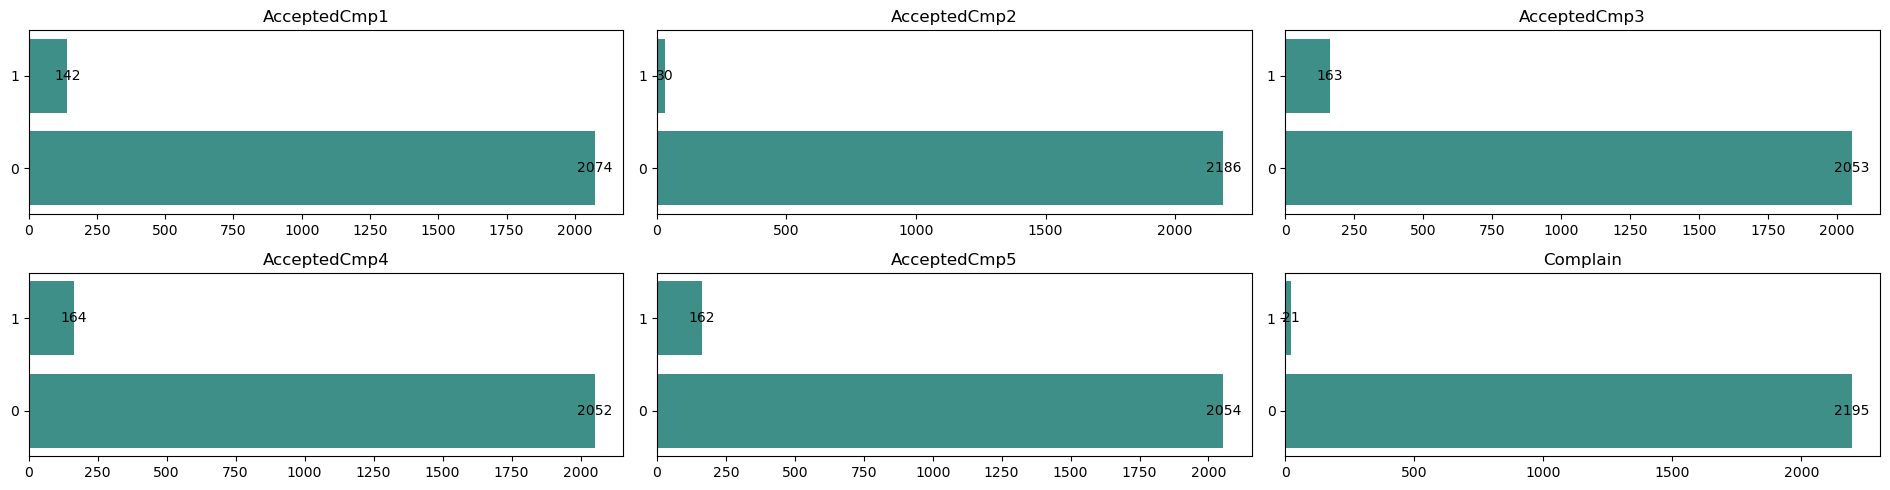

In [11]:
# AcceptedCmp and Complain 
cat_vars = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
    'AcceptedCmp4', 'AcceptedCmp5', 'Complain'
]

# create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(19, 5)) 

for i, ax in enumerate(axes.flatten()):
    if i < len(cat_vars):
        counts = data[cat_vars[i]].value_counts()
        ax.barh(counts.index, counts.values, color=b1)  # Interchanged x and y
        ax.set_title(cat_vars[i])

        # Set y-tick labels
        ax.set_yticks(range(len(counts)))  # Changed to set_yticks
        ax.set_yticklabels(counts.index)  # Changed to set_yticklabels

        # Add values inside the bars
        for j, v in enumerate(counts.values):
            ax.text(v, j, str(v), ha='center', va='center', weight='medium', size='medium')  # Interchanged x and y

    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# marital status
data['Marital_Status'].unique() # to check unique values

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
# replace values to single for easy understanding
data['Marital_Status'].replace(['Absurd', 'YOLO','Alone'],'Single', inplace=True) 

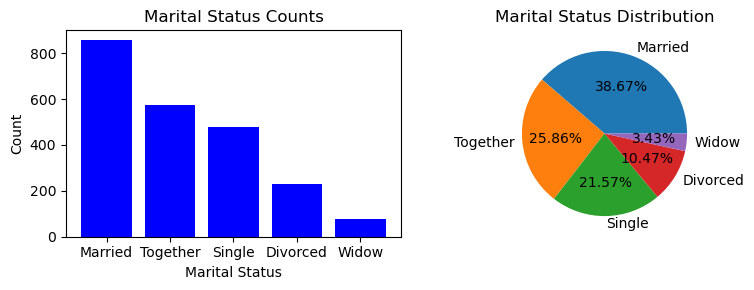

In [14]:
# Get the value counts for 'Marital_Status'
marital_counts = data['Marital_Status'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Plot the bar plot on the first subplot
axes[0].bar(marital_counts.index, marital_counts.values, color='b')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].set_title('Marital Status Counts')

# Plot the pie plot on the second subplot
axes[1].pie(marital_counts, labels=marital_counts.index, autopct='%.2f%%')
axes[1].set_title('Marital Status Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()